In [4]:
!pip install --quiet gradio

     |████████████████████████████████| 5.1 MB 5.2 MB/s 
     |████████████████████████████████| 212 kB 54.0 MB/s 
     |████████████████████████████████| 1.1 MB 61.9 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 256 kB 38.0 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 2.0 MB 43.7 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 271 kB 37.6 MB/s 
     |████████████████████████████████| 144 kB 46.0 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 11.1 MB 32.1 MB/s 
     |████████████████████████████████| 80 kB 7.7 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 856 kB 49.3 MB/s 
     |████████████████████████████████| 62 kB 791 kB/s 
     |████████████████████████

In [5]:
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.exceptions import NotFittedError
import gradio as gr
import cv2
import os

 Step 1 (5 points) Prepare the MNIST dataset

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11501568/11490434 [==============================] - 0s 0us/step


 Step 2 (5 points) Visualize the digit images

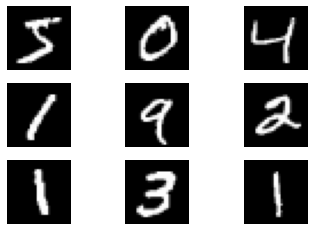

In [8]:
for i in range(9):	
  plt.subplot(330 + 1 + i)
  plt.axis("OFF")
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()


In [8]:
img_shape1 = x_test.shape
n_samples1 = img_shape1[0]
width1 = img_shape1[1]
height1 = img_shape1[2]

In [9]:
img_shape = x_train.shape
n_samples = img_shape[0]
width = img_shape[1]
height = img_shape[2]

In [19]:
x_train_flatten = x_train.reshape(n_samples, width*height)

print("x_train_flatten.shape: ",x_train_flatten.shape)

x_train_flatten.shape:  (60000, 784)


2 points) Give your own descriptions for the following four parameters about their purpose defined in this function: 'n_neighbors', 'metric', 'p', 'n_jobs'. 

1. n_neighbors it is a integer value, it gives us the number of neighbors our algorithm should look for  
2. metric A distance metric is value which is calculated by using a funciton, which gives us which distance can be used for a particular dataset. 
3. p it is a parameter for the metric function decide the distance.
4. n_jobs the number of parallel searches our algorithm will perform



2 points) Give your own descriptions for the following four methods about their purpose defined in this function: ‘fit(X,y)’, 'predict(X)', 'predict_proba', 'score(X,y)'. The description should include your understanding of the computation steps that each method conducts in the KNN algorithm. Other methods given in the sklearn document are worth understanding as well. (Members in a same group must have your own language in your submitted notebook)

 

1. fit(x,y): fit is to train the model with the features and the labels 
2. predict(x): the prediction is to predtict a particular value by our training model, x is the value to be predict.
3. pretict proba : predict_proba return the class porobability of each data point
4. score(x,y) : the score is the accuracy metrics,it gives us how our model performs well. x i the acutal label and y is the predicted label.





Step 3 (15 points):Training the KNN model  (try any K value as you wish) on the training set (60000 images), and report the running time during the prediction process on the test set (10000 images).

In [131]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(x_train_flatten,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
x_test_flatten = x_test.reshape(n_samples1,width1*height1)
print("x_test_flatten.shape: ",x_test_flatten.shape)


x_test_flatten.shape:  (10000, 784)


2 points) Training the KNN model  (try any K value as you wish) on the training set (60000 images), and report the running time during the prediction process on the test set (10000 images).

In [132]:
import time
start = time.time()

#Run your codes here
y_test_pred = KNN_classifier.predict(x_test_flatten)
end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

Program finishes in 41.60312533378601 seconds:


(2 points) Organize the predicted classes and actual classes into Pandas dataframe as follows:

In [128]:
data={"predicted_value":y_test_pred,"acutal":y_test}
df=pd.DataFrame(data)
df

,predicted_value,acutal
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


2 points) Calculate the overall accuracy of the predictions. 

In [26]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy:  0.9705


4 points) Calculate the per-class accuracy of the predictions

In [27]:
def accuracy(y_test,y_test_pred):
  for i in range(0,10):
    a = np.where(y_test==i,1,0)
    b = np.where(y_test_pred == i,1,0)
    val=np.where(a == b,1,0)
    sum_value=val.sum()
    total=len(a)
    accuracy= (sum_value/total)*100
    print("accuracy of  is "+str(i),accuracy)

In [28]:
accuracy(y_test,y_test_pred)

accuracy of  is 0 99.6
accuracy of  is 1 99.48
accuracy of  is 2 99.46000000000001
accuracy of  is 3 99.29
accuracy of  is 4 99.44
accuracy of  is 5 99.37
accuracy of  is 6 99.7
accuracy of  is 7 99.27
accuracy of  is 8 99.3
accuracy of  is 9 99.19


 (1 points) Let's visualize the classification confusion matrix to check the details of the predictions for each class. 

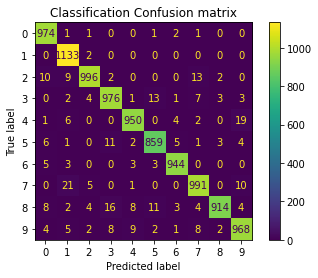

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Classification Confusion matrix")
plt.show()

(5 points) Step 1: Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. 

In [30]:
val1=scipy.ndimage.shift(x_train[0], [2,-1], cval=0)
val2=scipy.ndimage.shift(x_train[0], [2,1], cval=0)
val3=scipy.ndimage.shift(x_train[0], [-2,-1], cval=0)
val4=scipy.ndimage.shift(x_train[0], [-2,1], cval=0)

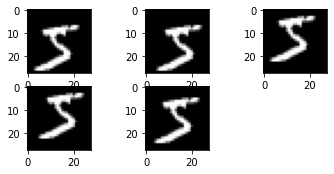

In [36]:
li=[val1,val2,val3,val4,x_train[0]]
for i in range(len(li)):
  plt.subplot(330 + 1 +i )
  plt.imshow(li[i], cmap=plt.get_cmap('gray'))
plt.show()

(5 points) Step 2: Write a function that can rotate an MNIST image in any degree (Clockwise & Counterclockwise) of image matrix. 

In [39]:
val5=scipy.ndimage.rotate(input=x_train[0],angle=-20, reshape=False, cval=0)
val6=scipy.ndimage.rotate(input=x_train[0],angle=20, reshape=False, cval=0) 

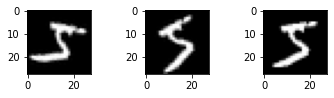

In [40]:
li1=[val5,val6,x_train[0]]
for i in range(len(li1)):
  plt.subplot(330 + 1 +i )
  plt.imshow(li1[i], cmap=plt.get_cmap('gray'))
plt.show()

(3 points) Step 3: Apply the image shifting and rotate function on the whole training set. For each image in the training set, create four shifted copies (one per direction), two rotated copies (clockwise, counterclockwise), and add them to the training set. Therefore, the number of training images will be increased from 60000 to 420000 (60000*(1+4+2)).   

In [57]:
combine1=x_train_flatten

In [22]:
def shift_image(combine1,combine2):
  for i in range(0,len(x_train)):
    val1=scipy.ndimage.shift(x_train[i], [2,-1], cval=0)
    val1_new=val1.flatten().reshape(1,28*28)
    combine1= np.concatenate([combine1,val1_new])
    combine2=np.concatenate([combine2,np.array([y_train[i]])])
    val2=scipy.ndimage.shift(x_train[i], [2,1], cval=0)
    val2_new=val1.flatten().reshape(1,28*28)
    combine1= np.concatenate([combine1,val2_new])
    combine2=np.concatenate([combine2,np.array([y_train[i]])])
    val3=scipy.ndimage.shift(x_train[i], [-2,-1], cval=0)
    val3_new=val1.flatten().reshape(1,28*28)
    combine1= np.concatenate([combine1,val3_new])
    combine2=np.concatenate([combine2,np.array([y_train[i]])])
    val4=scipy.ndimage.shift(x_train[i], [-2,1], cval=0)
    val4_new=val1.flatten().reshape(1,28*28)
    combine1= np.concatenate([combine1,val4_new])
    combine2=np.concatenate([combine2,np.array([y_train[i]])])
    val5=scipy.ndimage.rotate(input=x_train[i], angle = -20, reshape=False, cval=0)
    val5_new = val5.flatten().reshape(1,28*28)
    combine1= np.concatenate([combine1,val5_new])
    combine2=np.concatenate([combine2,np.array([y_train[i]])])
    val6=scipy.ndimage.rotate(input=x_train[i], angle = 20, reshape=False, cval=0) 
    val6_new = val6.flatten().reshape(1,28*28) 
    combine1 = np.concatenate([combine1,val6_new])
    combine2=np.concatenate([combine2,np.array([y_train[i]])])
   
  return combine1,combine2

In [23]:
combine1=x_train_flatten
combine2=y_train
x_train_aug,y_train_aug= shift_image(combine1,combine2)

In [12]:
x_train_aug.shape

NameError: ignored

In [11]:
y_train_aug.shape

NameError: ignored

2 points) Training the KNN model on the augmented training set (420000 images), and report the running time during the prediction process on the test set (10000 images).




In [116]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier1 = KNeighborsClassifier(n_neighbors=3)
KNN_classifier1.fit(combine1,combine2)

KNeighborsClassifier(n_neighbors=3)

In [117]:
import time
start = time.time()

#Run your codes here
y_test_pred1 = KNN_classifier1.predict(x_test_flatten)
end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

Program finishes in 38.15823006629944 seconds:


(2 points) Organize the predicted classes and actual classes into Pandas dataframe as follows:

In [163]:
data1={"predited_label":y_test_pred1,"actual_label":y_test}
df1=pd.DataFrame(data1)
df1

,predited_label,actual_label
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


(2 points) Calculate the overall accuracy of the predictions. 

In [162]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred1))

Accuracy:  0.9705


(2 points) Calculate the per-class accuracy of the predictions.

In [120]:
def accuracy(y_test,y_test_pred1):
  for i in range(0,10):
    a = np.where(y_test==i,1,0)
    b = np.where(y_test_pred1 == i,1,0)
    val=np.where(a == b,1,0)
    sum_value=val.sum()
    total=len(a)
    accuracy= (sum_value/total)*100
    print("accuracy of  is "+str(i),accuracy)

In [121]:
accuracy(y_test,y_test_pred1)

accuracy of  is 0 99.6
accuracy of  is 1 99.48
accuracy of  is 2 99.46000000000001
accuracy of  is 3 99.29
accuracy of  is 4 99.44
accuracy of  is 5 99.37
accuracy of  is 6 99.7
accuracy of  is 7 99.27
accuracy of  is 8 99.3
accuracy of  is 9 99.19




5. (2 points) Let's visualize the classification confusion matrix to check the details of the predictions for each class

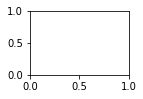

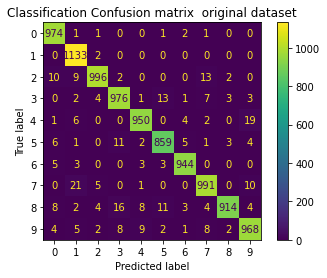

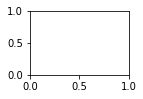

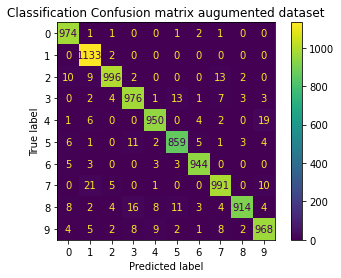

In [156]:
plot1=plt.subplot(330 + 1 + 0)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Classification Confusion matrix  original dataset")
plt.show()
plot2=plt.subplot(330 + 1 + 1)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred1)
plt.title("Classification Confusion matrix augumented dataset")
plt.show()


In [161]:
x_train_aug.shape

(420000, 784)

(2 points) Compare the difference of performance and describe whether the data augmentation boosts the overall accuracy and per-class accuracy.

somehome the data augumnetation should improve the accuracy but in my case the accuracy is same for both original dataset and augumented dataset.
with different k values,the accuracy per class tend to increase.

Part III (25 points):  Deploy the machine learning models on Gradio or huggingface

In [59]:
input_module1 = gr.inputs.Image(shape=(28, 28),label = "Input Image",  image_mode='L')
input_module2 = gr.inputs.Slider(1, 29, step=1, label = "k_value")

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [60]:
output_module1 = gr.outputs.Textbox(label = "Output Text")

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [157]:
def multi_inputs(input1, input2):
  input_val=input1
  input_val= input_val.flatten().reshape(1,28*28)
  KNN_classifier = KNeighborsClassifier(n_neighbors=input2)
  KNN_classifier.fit(x_train_flatten,y_train)
  try:
    y_pred = KNN_classifier.predict(input_val)
    return (y_pred)[0]
  except NotFittedError as e:
      print(repr(e))


In [158]:
def get_sample_images(num_images):
    sample_images = []
    for i in range(num_images):
      test_feature = x_test[i]
      test_feature_2d =test_feature.flatten().reshape(28,28)
    
      # Make it unsigned integers:
      data = test_feature_2d.astype(np.uint8)

      outdir =  "images_folder"
      img_path = os.path.join(outdir, 'local_%05d.png' % (i,))
      if not os.path.exists(outdir):
         os.mkdir(outdir)
      cv2.imwrite(img_path, data)

      sample_images.append([img_path,int(np.random.choice([7,9,11,13,15,24]))])   # ["image path", "K"]
    return sample_images

In [159]:
sample_images = get_sample_images(10)

In [164]:
gr.Interface(fn=multi_inputs, 
             inputs=[input_module1, input_module2], 
             outputs=[output_module1],
             examples=sample_images
            ).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://42005.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f17d3cf9e90>,
 'http://127.0.0.1:7866/',
 'https://42005.gradio.app')

Exception in callback None(<Task finishe...> result=None>)
handle: <Handle>
Traceback (most recent call last):
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
TypeError: 'NoneType' object is not callable
